#  Анализ развлекательного приложения Procrastinate Pro+

## Содержание:

1. Загрузка данных и подготовка их к анализу
 - 1.1  Импортирование нужных библиотек
 - 1.2 Загрузка файла и предварительное ознакомление с данными
 - 1.3. Предобработка данных
2. Создание функций для расчёта и анализа LTV, ROI, удержания и конверсии
3. Исследовательский анализ данных
 - 3.1. Составление профилей пользователей. Определение минимальной и максимальной даты привлечения пользователей
 - 3.2. Построение таблицы, отражающей количество пользователей и долю платящих из каждой страны
 - 3.3. Построение таблицы, отражающей количество пользователей и долю платящих для каждого устройства
 - 3.4. Построение таблицы, отражающей количество пользователей и долю платящих для каждого канала привлечения
4. Маркетинг
 - 4.1. Расчет расходов на маркетинг
 - 4.2. Распределение трат по рекламным источникам
 - 4.3. Визуализация динамики изменения расходов во времени
 - 4.4. Cколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника
 - 4.5. Общий САС по всем каналам
5. Оценка окупаемость рекламы
 - 5.1 Окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI
 - 5.2. Конверсия пользователей и динамика изменения, удержание пользователей
 - 5.3. Окупаемость рекламы с разбивкой по устройствам
 - 5.4. Окупаемость рекламы с разбивкой по странам
 - 5.5. Окупаемость рекламы с разбивкой по рекламным каналам
6. Выводы по проекту

<b>Цель исследования</b> - выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

<b>Исходные данные</b> - данные приложения «Procrastinate Pro+».
- лог сервера с данными об их посещениях
- выгрузка их покупок за этот период
- рекламные расходы.

<b>Вопросы, интересующие заказчика:</b>

- Откуда приходят пользователи и какими устройствами они пользуются
- Сколько стоит привлечение пользователей из различных рекламных каналов
- Сколько денег приносит каждый клиент
- Когда расходы на привлечение клиента окупаются
- Какие факторы мешают привлечению клиентов

## Описание данных

В вашем распоряжении три датасета. Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.

Структура **visits_info_short.csv**:
- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.

Структура **orders_info_short.csv**:
- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.

Структура **costs_info_short.csv**:
- dt — дата проведения рекламной кампании,
- Channel — идентификатор рекламного источника,
- costs — расходы на эту кампанию.

## Загрузка данных и подготовка их к анализу

### 1.1 Импортирование нужных библиотек

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import scipy as sp

###  1.2. Загрузка файла и предварительное ознакомление с данными

In [2]:
try:
    costs = pd.read_csv('D://Users/corti/notebooks/8/costs_info_short.csv', sep=',')
except:
    costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')

In [3]:
try:
    orders = pd.read_csv('D://Users/corti/notebooks/8/orders_info_short.csv', sep=',')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')

In [4]:
try:
    visits = pd.read_csv('D://Users/corti/notebooks/8/visits_info_short.csv', sep=',')
except:
    visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')

In [5]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [6]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [7]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [9]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [10]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


**Вывод**:
 - costs имеет 3 столбца и 1800 строк
 - orders имеет 3 столбца и 40212 строк
 - visits имеет 6 столбцов и 309901 строку
 
 Сразу бросается в глаза формат даты, в последствии заменим на правильные.

### 1.3. Предобработка данных

Приведем названия колонок к нижнему регистру, уберем пробелы.

In [11]:
visits.columns = map(str.lower, visits.columns)
visits.columns = visits.columns.str.replace(' ', '_')
costs.columns = map(str.lower, costs.columns)
costs.columns = costs.columns.str.replace(' ', '_')
orders.columns = map(str.lower, orders.columns)
orders.columns = orders.columns.str.replace(' ', '_')

Для начала проверим каждый дата фрейм на пропущенные значения.

In [12]:
print('visits')
print(visits.isna().sum())
print('')
print('costs')
print(costs.isna().sum())
print('')
print('orders')
print(orders.isna().sum())

visits
user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

costs
dt         0
channel    0
costs      0
dtype: int64

orders
user_id     0
event_dt    0
revenue     0
dtype: int64


**Вывод:** Пропущенные значнения не обнаружены ни в одном дата фрейме.

Выполним поиск явных дубликатов

In [13]:
print('Дубликаты visits:', visits.duplicated().sum())
print('Дубликаты costs:',costs.duplicated().sum())
print('Дубликаты orders:',orders.duplicated().sum())

Дубликаты visits: 0
Дубликаты costs: 0
Дубликаты orders: 0


**Вывод:** Явные дубликаты также отсутствуют.

Заменим формат столбцов с датами в каждом дата фрейме.

In [14]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

**Вывод:** После выполненной проверки на дубликаты, обработки ячеек с датами, названий колонок можно приступать к следующему этапу.

## 2. Создание функции для расчёта и анализа LTV, ROI, удержания и конверсии

Напишем функции для расчёта и анализа LTV, ROI, удержания и конверсии.

In [15]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, costs):
    # находим параметры первых посещений
    profiles = (sessions.sort_values(by=['user_id', 'session_start'])
                .groupby('user_id')
                .agg(
                    {
                        'session_start' : 'first',
                        'channel' : 'first',
                        'device' : 'first',
                        'region' : 'first'
                    }
                )
                .rename(columns={'session_start' : 'first_ts'})
                .reset_index()
               )
    
    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    
    # добавляем признак пользователей, совершивших покупку
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
    
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    
    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = costs.merge(new_users, on=['dt', 'channel'], how='left')
    
    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    
    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles

In [16]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - dt.timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [17]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - dt.timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_orders = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_orders[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [18]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - dt.timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [19]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [20]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [21]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [22]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True,ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## 3. Исследовательский анализ данных

### 3.1. Составление профилей пользователей. Определение минимальной и максимальной даты привлечения пользователей

Составление профилей пользователей.


In [23]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Определение минимальной и максимальной даты привлечения пользователей.

In [24]:
min_date = costs['dt'].min()
max_date = costs['dt'].max()
print("Минимальная дата:", min_date)
print("Максимальная дата:", max_date)

Минимальная дата: 2019-05-01
Максимальная дата: 2019-10-27


**Вывод:** Данные максимальной и минимальной даты привлечения пользователей совпадают с изначально заданными границами анализа.

### 3.2. Построение таблицы, отражающей количество пользователей и долю платящих из каждой страны

Нужно выяснить, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построить таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [25]:
country_payers = (profiles.groupby('region')
                  .agg({'user_id':'count', 'payer':['mean', 'sum']})
                  .sort_values([('payer', 'sum')], ascending = False)
                 )
country_payers

user_id     payer      
                count      mean   sum
region                               
United States  100002  0.069019  6902
UK              17575  0.039829   700
France          17450  0.037994   663
Germany         14981  0.041119   616

**Вывод:** Лидирующее место по количеству платящих пользователей держит **United States**, затем с большим отрывом идут **UK**, **France** и **Germany**.

### 3.3. Построение таблицы, отражающей количество пользователей и долю платящих для каждого устройства

In [26]:
device_payers = (profiles.groupby('device')
                         .agg({'user_id':'count', 'payer':['mean', 'sum']})
                         .sort_values([('payer', 'mean')], ascending = False)
                )
device_payers

user_id     payer      
          count      mean   sum
device                         
Mac       30042  0.063644  1912
iPhone    54479  0.062079  3382
Android   35032  0.058518  2050
PC        30455  0.050468  1537

**Вывод:** Самыми платящими пользователями оказались владельцы **Mac**, затем с небольшим отрывом идет **IPhone**. Пользователи платформы **Android** отстают от владельцев **IPhone**. Наименьшая доля платящих у платформы **PC**.

### 3.4. Построение таблицы, отражающей количество пользователей и долю платящих для каждого канала привлечения

In [27]:
channels_payers = (profiles.groupby('channel')
                           .agg({'user_id':'count', 'payer':['mean', 'sum']})
                           .sort_values([('payer', 'mean')], ascending = False)                  
                  )
channels_payers

user_id     payer      
                     count      mean   sum
channel                                   
FaceBoom             29144  0.122049  3557
AdNonSense            3880  0.113402   440
lambdaMediaAds        2149  0.104700   225
TipTop               19561  0.096007  1878
RocketSuperAds        4448  0.079137   352
WahooNetBanner        8553  0.052964   453
YRabbit               4312  0.038265   165
MediaTornado          4364  0.035747   156
LeapBob               8553  0.030633   262
OppleCreativeMedia    8605  0.027077   233
organic              56439  0.020553  1160

**Вывод:** Самый платящий процент аудитории соответствует каналу **FaceBoom**. Затем 2 и 3 место занимают **AdNonSense** и **lambdaMediaAds**, при наименьших значениях привлеченных пользователей процент платящих выше, чем у 4 канала **TipTop**. Замыкает же список канал под названием **organic** с наименьшим процентом платящих пользователей.

**Общий вывод:** В этом разделе мы рассмотрели такие вопросы как:
- составление профилей пользователей
- определение минимальной и максимальной даты привлечения пользователей
- из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей
- какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи
- рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей

И сделали соответствующие выводы:
- данные максимальной и минимальной даты привлечения пользователей совпадают с изначально заданными границами анализа (2019-05-01 - 2019-10-27)
- лидирующее место по количеству платящих пользователей держит United States, затем с большим отрывом идут UK, France и Germany
- самыми платящими пользователями оказались владельцы Mac, затем с небольшим отрывом идет IPhone. Пользователи платформы Android отстают от владельцев IPhone. Наименьшая доля платящих у платформы PC
- самый платящий процент аудитории соответствует каналу FaceBoom. Затем 2 и 3 место занимают AdNonSense и lambdaMediaAds, при наименьших значениях привлеченных пользователей процент платящих выше, чем у 4 канала TipTop. Замыкает же список канал под названием organic с наименьшим процентом платящих пользователей

## 4. Маркетинг

### 4.1. Расчет расходов на маркетинг

In [28]:
costs.costs.sum().round(1)

105497.3

**Вывод:** Суммарные расходы на рекламу равны 105 497 300$.

### 4.2. Распределение трат по рекламным источникам

Нужно выяснить, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [29]:
channel_costs = costs.pivot_table(index='channel', values='costs', aggfunc='sum')
channel_costs['sum_costs'] = costs.costs.sum().round(1)
channel_costs['.%'] =  channel_costs['costs'] / channel_costs['sum_costs'] * 100
channel_costs = channel_costs.drop('sum_costs', axis=1).sort_values(by = '.%', ascending=False)
channel_costs

,costs,.%
channel,,
TipTop,54751.30,51.898295
FaceBoom,32445.60,30.754910
WahooNetBanner,5151.00,4.882589
AdNonSense,3911.25,3.707441
OppleCreativeMedia,2151.25,2.039152
RocketSuperAds,1833.00,1.737485
LeapBob,1797.60,1.703930
lambdaMediaAds,1557.60,1.476436
MediaTornado,954.48,0.904744


**Вывод:** Самыми крупными вложениями можно считать каналы **TipTop** (54 миллиона) и **FaceBoom** (32 миллиона). Замыкает список канал **YRabbit** с общим числом вложений в 944 тысячи.

### 4.3. Визуализация динамики изменения расходов во времени

Нужно построить визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Для начала выделим недели и месяца в отдельные колонки.

In [30]:
costs['month'] = pd.to_datetime(costs['dt']).dt.month
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week

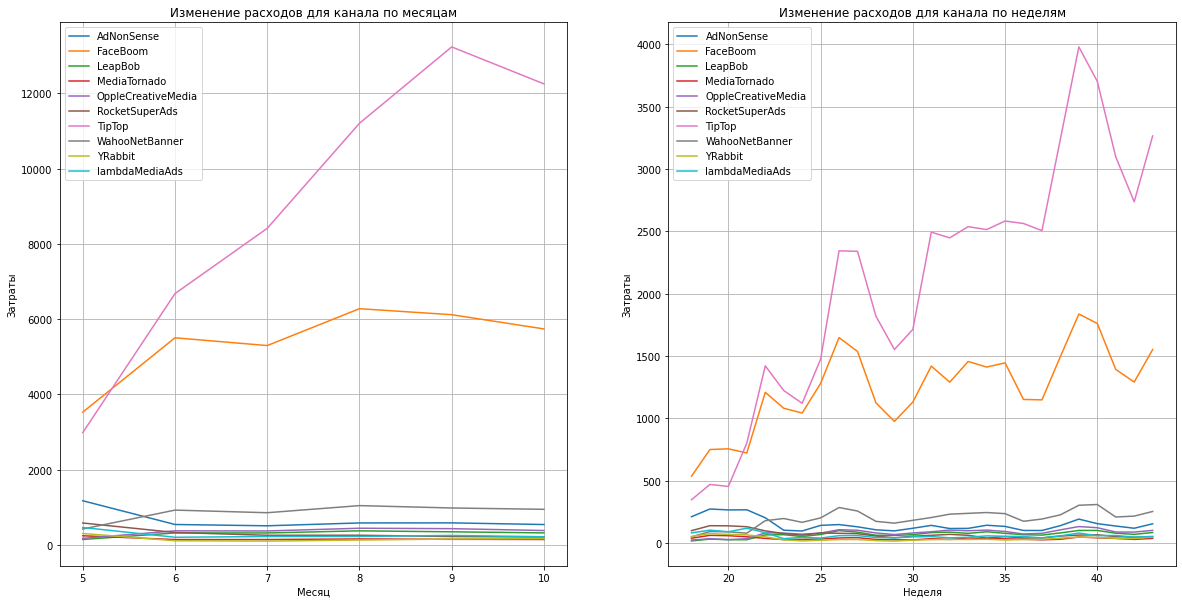

In [31]:
plt.figure(figsize = (20,10))
costs.head()
ax_week = plt.subplot(1,2,2)
costs_week = costs.pivot_table(index='week', columns = 'channel', values = 'costs', aggfunc='sum')
costs_week.plot(grid=True, ax = ax_week)
plt.legend()
plt.xlabel('Неделя')
plt.ylabel('Затраты')
plt.title('Изменение расходов для канала по неделям')

ax_month = plt.subplot(1,2,1)
costs_month = costs.pivot_table(index='month', columns = 'channel', values = 'costs', aggfunc='sum')
costs_month.plot(grid=True, ax = ax_month)
plt.legend()
plt.xlabel('Месяц')
plt.ylabel('Затраты')
plt.title('Изменение расходов для канала по месяцам')

plt.show()

**Вывод:** Как и было выяснено ранее. Самые крупные по объему затрат каналы это **TipTop** и **FaceBoom**. Причем график **FaceBoom** на протяжении всей кампании вырос не столь заметно в сравнении с графиком **TipTop**. Однако затраты на рекламу на обоих каналах выросли.

### 4.4. Cколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника

Нужно узнать, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника использовав профили пользователей.

In [32]:
(
profiles.groupby('channel')['acquisition_cost']
        .agg('mean').sort_values(ascending = False)
)

channel
TipTop                2.799003
FaceBoom              1.113286
AdNonSense            1.008054
lambdaMediaAds        0.724802
WahooNetBanner        0.602245
RocketSuperAds        0.412095
OppleCreativeMedia    0.250000
YRabbit               0.218975
MediaTornado          0.218717
LeapBob               0.210172
organic               0.000000
Name: acquisition_cost, dtype: float64

**Вывод:** Самые "дорогие" пользователи приходят по каналу **TipTop**, при таких затратах на рекламу это было очевидно. Затем с большим отрывом идут **FaceBoom** и **AdNonSense**. Канал **organic** скорее всего бесплатный, т.к. его не было в графике по затратам и САС для него определился как 0. В этом случае самыми "дешевыми" пользователями будут с канала **LeapBob**.

### 4.5. Общий САС по всем каналам

In [33]:
profiles_cac = profiles.query('channel != "organic"')
profiles_cac['acquisition_cost'].describe()

count    93569.000000
mean         1.127481
std          0.990503
min          0.124615
25%          0.257143
50%          1.080531
75%          1.128571
max          3.715385
Name: acquisition_cost, dtype: float64

**Вывод:** Среднее значение САС равно 1.12, а медианное 1.08, думаю это связанно с большими затратами на рекламу в определенных источниках

**Общий вывод:** В этом разделе мы рассмотрели такие вопросы как:
- общая сумма расходов на маркетинг
- как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник
- визуализация динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику
- сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника
- общий САС по всем каналам

И сделали соответствующие выводы:
- cуммарные расходы на рекламу равны 105 497 300 долларов
- cамыми крупными вложениями можно считать каналы TipTop (54 миллиона) и FaceBoom (32 миллиона). Замыкает список канал YRabbit с общим числом вложений в 944 тысячи
- самые крупные по объему затрат каналы это TipTop и FaceBoom. Причем график FaceBoom на протяжении всей кампании вырос не столь заметно в сравнении с графиком TipTop. Однако затраты на рекламу на обоих каналах выросли
- самые "дорогие" пользователи приходят по каналу TipTop, при таких затратах на рекламу это было очевидно. Затем с большим отрывом идут FaceBoom и AdNonSense. Канал organic скорее всего бесплатный, т.к. его не было в графике по затратам и САС для него определился как 0. В этом случае самыми "дешевыми" пользователями будут с канала LeapBob
- среднее значение САС равно 1.12, а медианное 1.08, думаю это связанно с большими затратами на рекламу в определенных источниках

## 5. Оценка окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируеем окупаемость рекламы. Считаем, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определим самостоятельно.

### 5.1 Окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI

Нужно проанализировать окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
Считаем, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Будем считать что исключение из анализа органических пользователей обязательно,т.к. они сами по себе не влекут никаких затрат.
Также нужно ответить на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом?
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости?

In [34]:
new_date = dt.datetime(2019, 11, 1).date()
horizon_days = 14
new_profiles = profiles.query('channel != "organic"')

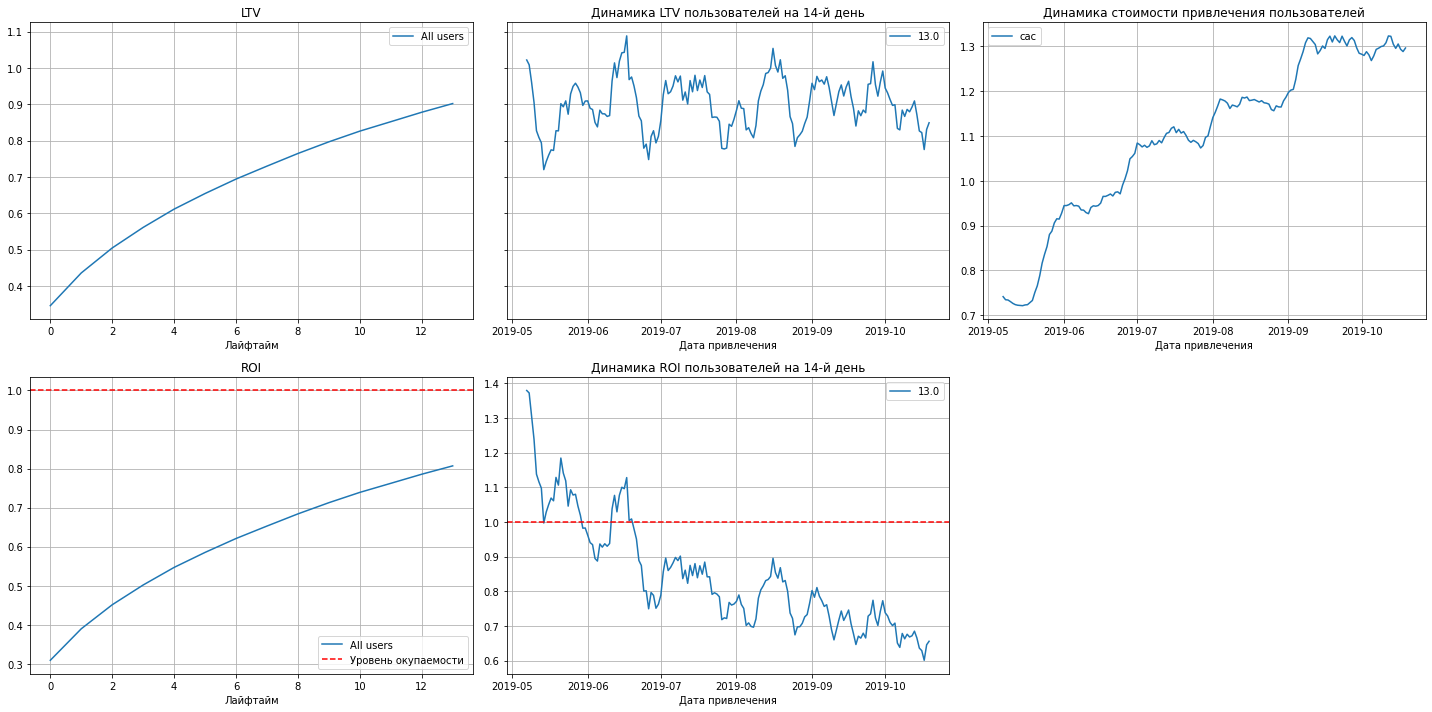

In [35]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    new_profiles, 
    orders, 
    new_date, 
    horizon_days
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Вывод:**
- **LTV** стабильно увеличивается на протяжении 14 дней, значит с этим показателем все в порядке, также его динамика находится на примерно одинаковом уровне
- Стоимость привлечения одного клиента также возросла
- **ROI** в конце периода доходит до отметки в **80%**, что говорит о неокупаемости рекламы, также его динамки значительно снижается на протяжени 14 дней

### 5.2. Конверсия пользователей и динамика изменения, удержание пользователей

Нужно проверить конверсию пользователей и динамику её изменения. То же самое сделать с удержанием пользователей. Построить и изучить графики конверсии и удержания.

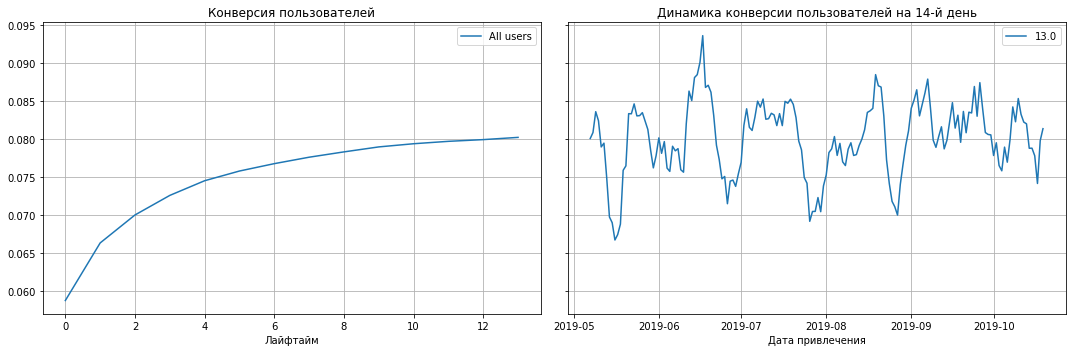

In [36]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    new_profiles, 
    orders, 
    new_date, 
    horizon_days
)
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**Вывод:** Конверсия пользователей в первую неделю увеличиватется и к концу рассматриваемого периода доходит до **80%**

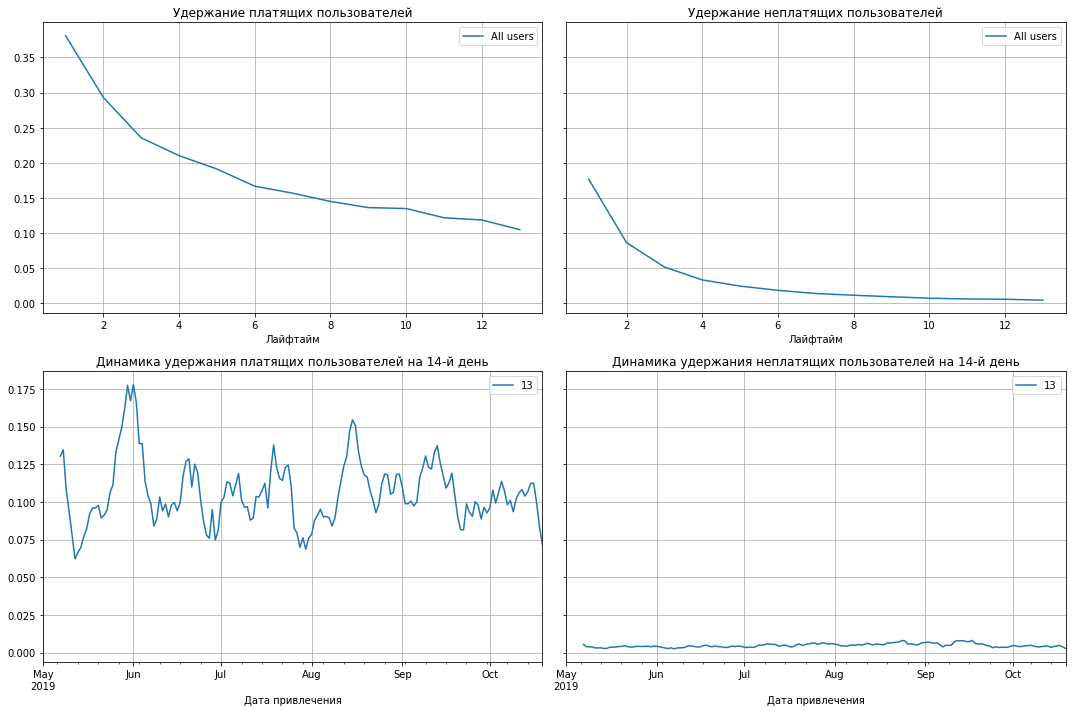

In [37]:
retention_raw, retention_grouped, retention_history = get_retention(
    new_profiles, 
    visits, 
    new_date, 
    horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:**
 - График **Retention Rate** отражает ухудшающуюся динамику удержания платящих и не платящих пользователей
 - Возможно, что часть проблем кроится в этом, но нужно проверить остальные варианты

### 5.3. Окупаемость рекламы с разбивкой по устройствам

Нужно проанализировать окупаемость рекламы с разбивкой по устройствам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

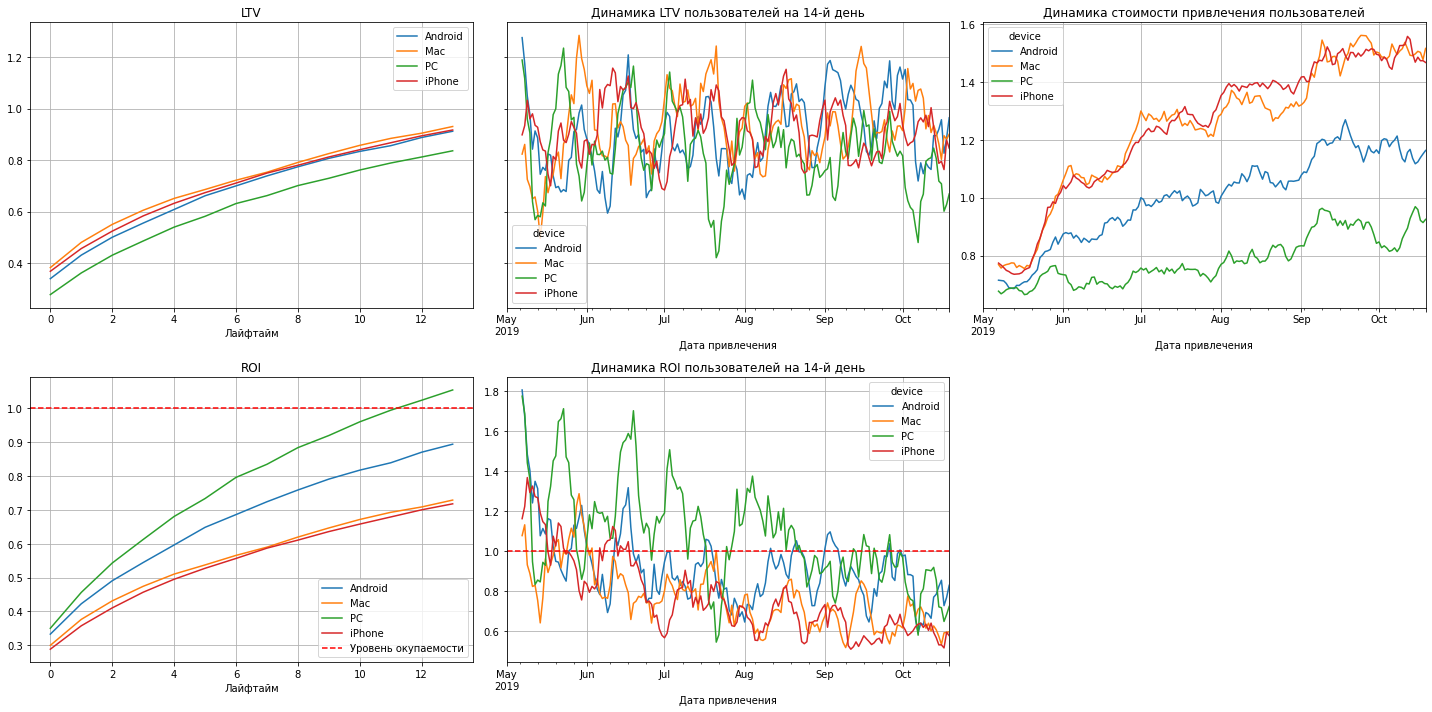

In [38]:
dimensions = ['device']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    new_profiles, 
    orders, 
    new_date, 
    horizon_days, 
    dimensions=dimensions
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

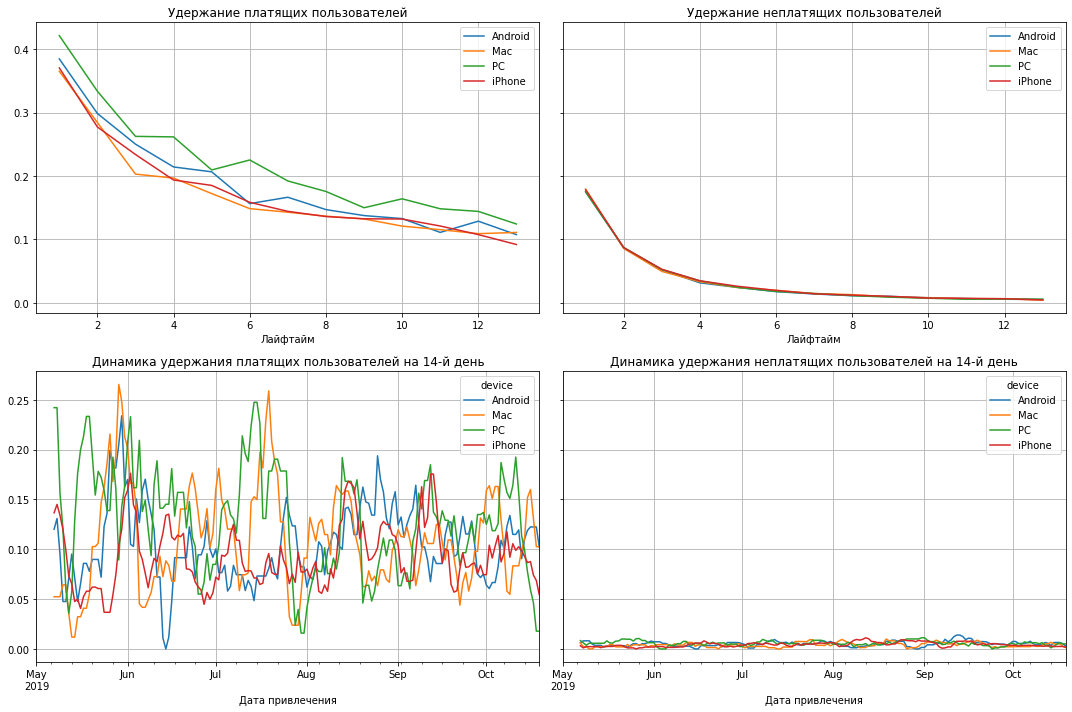

In [39]:
dimensions = ['device']
retention_raw, retention_grouped, retention_history = get_retention(
    new_profiles, visits, new_date, horizon_days, dimensions = dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

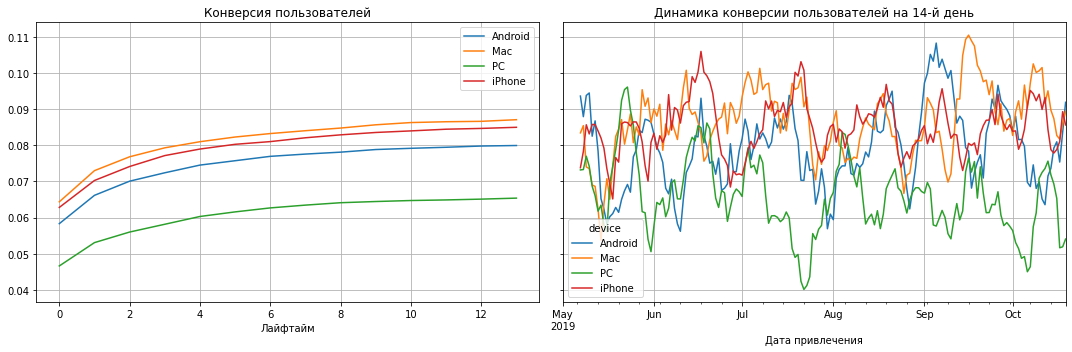

In [40]:
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    new_profiles, 
    orders, 
    new_date, 
    horizon_days,
    dimensions = dimensions
)
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**Вывод:**
- **LTV** стабильно повышается у пользователей всех устройств
- График **ROI** говорит о том, что практически на всех платформах, кроме **PC** приложение не окупается
- Удержание платящих пользователей на протяжении всего промежутка времени падает 
- Динамика удержания не платящих пользователей также ухудшается
- Конверсия пользователей **PC** заметно отстает от других платформ

### 5.4. Окупаемость рекламы с разбивкой по странам

Нужно проанализировать окупаемость рекламы с разбивкой по странам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

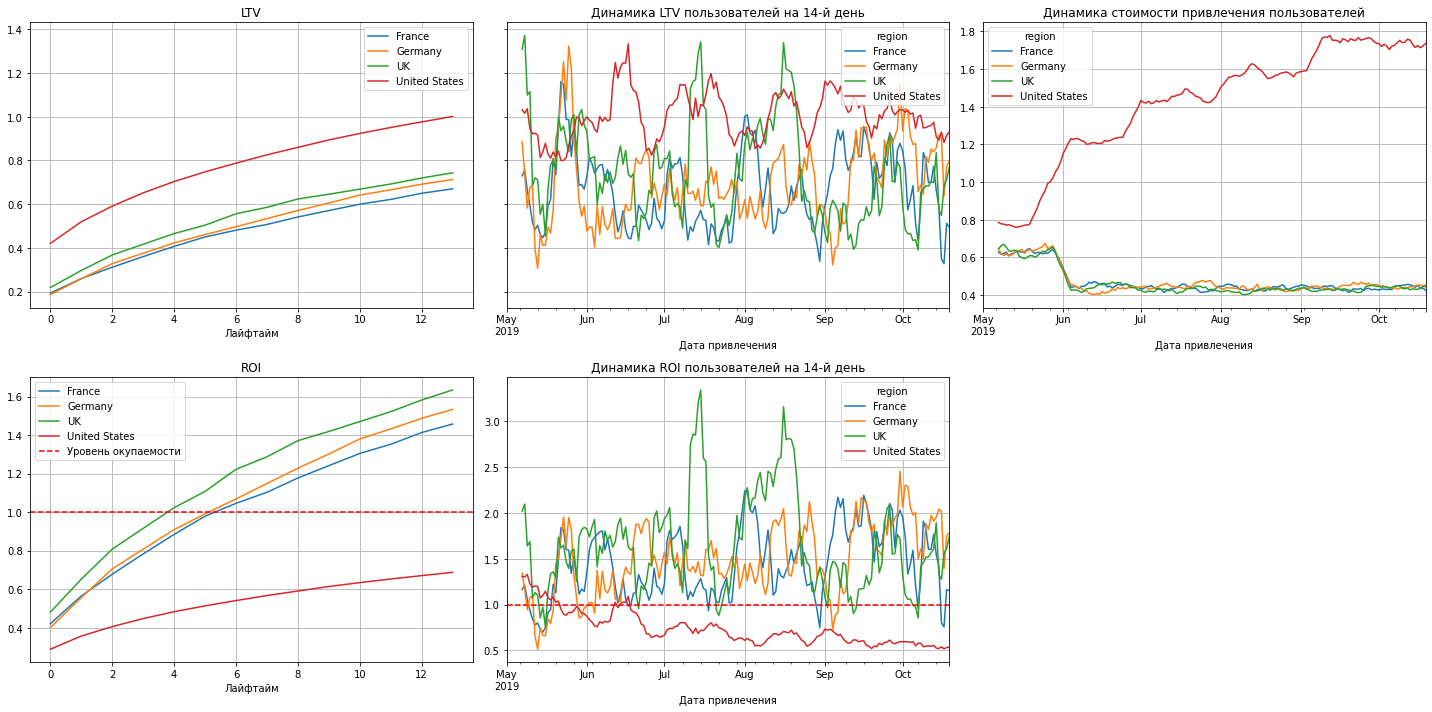

In [41]:
dimensions = ['region']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    new_profiles, 
    orders, 
    new_date, 
    horizon_days, 
    dimensions=dimensions
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

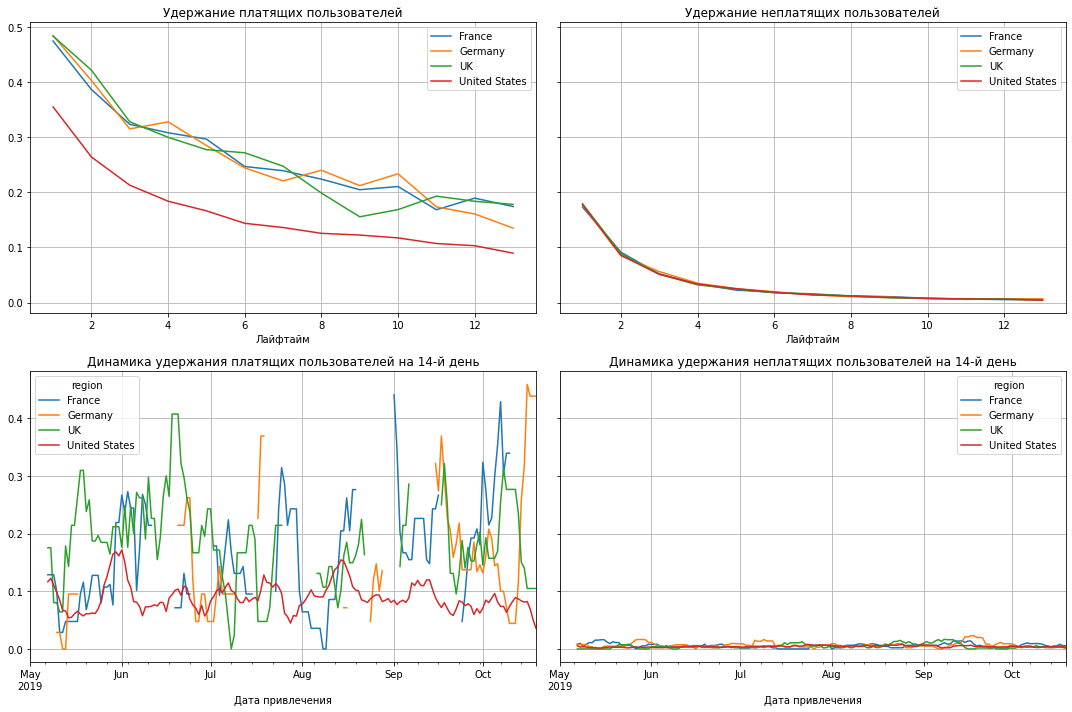

In [42]:
retention_raw, retention_grouped, retention_history = get_retention(
    new_profiles, visits, new_date, horizon_days, dimensions = dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

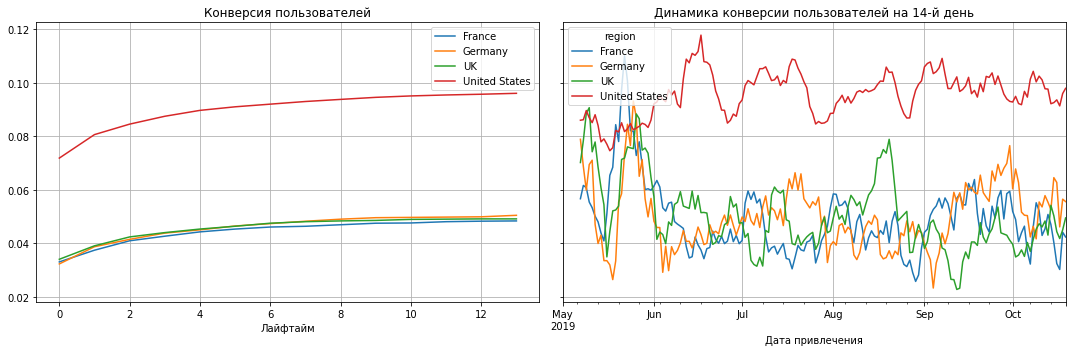

In [43]:
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    new_profiles, 
    orders, 
    new_date, 
    horizon_days,
    dimensions = dimensions
)
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**Вывод:**
- График **LTV** у пользователей из **United States** самый высокий, тажке все графики из этой категории показывают растущее значение
- **ROI** показывает неокупаемость также у пользователей из **United States**, скорее всего это связано с увеличением затрат на привлечение из этого региона
- Удержание платящих пользователей ожидаемо падает
- Динамика удержания не платящих пользователей также ухудшается
- Cамая большая конверсия у пользователей из **United States**


### 5.5. Окупаемость рекламы с разбивкой по рекламным каналам

Нужно проанализироватье окупаемость рекламы с разбивкой по рекламным каналам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

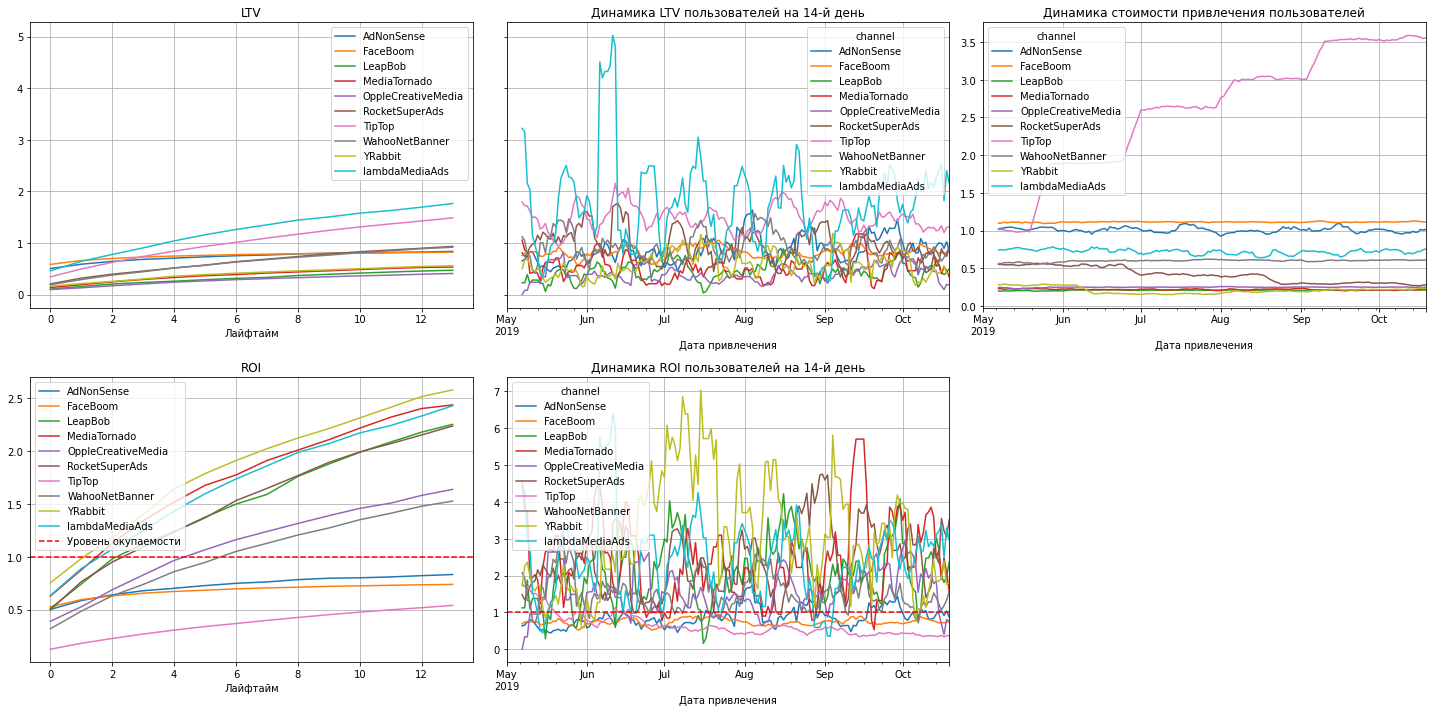

In [44]:
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    new_profiles, 
    orders, 
    new_date, 
    horizon_days, 
    dimensions=dimensions
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

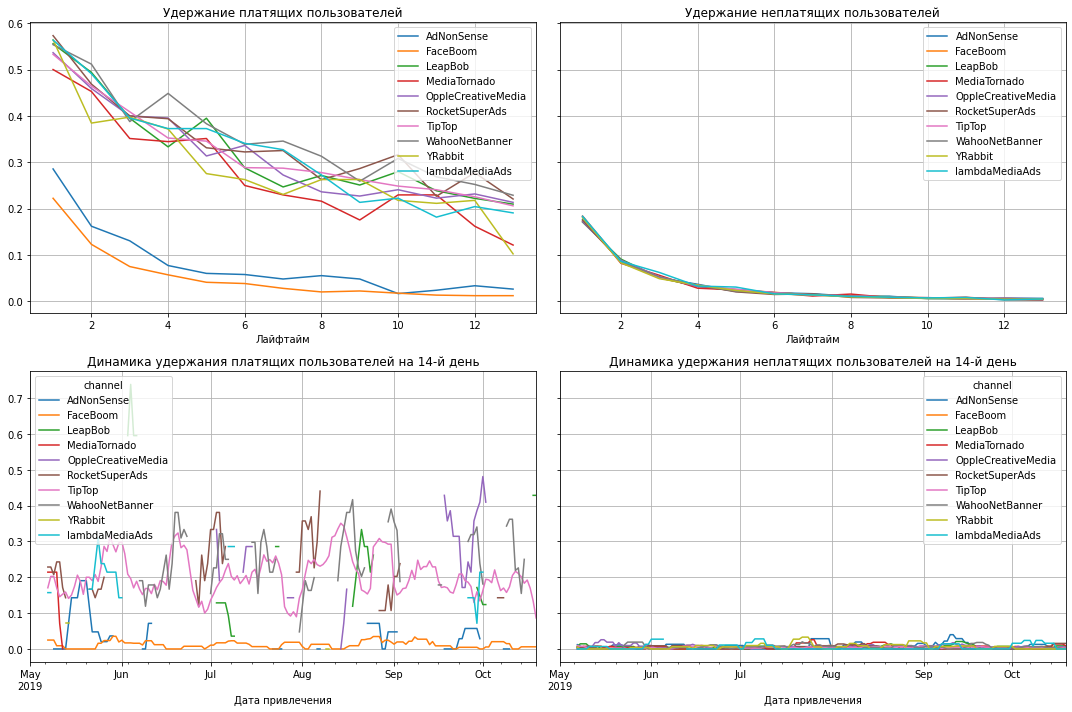

In [45]:
retention_raw, retention_grouped, retention_history = get_retention(
    new_profiles, visits, new_date, horizon_days, dimensions = dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

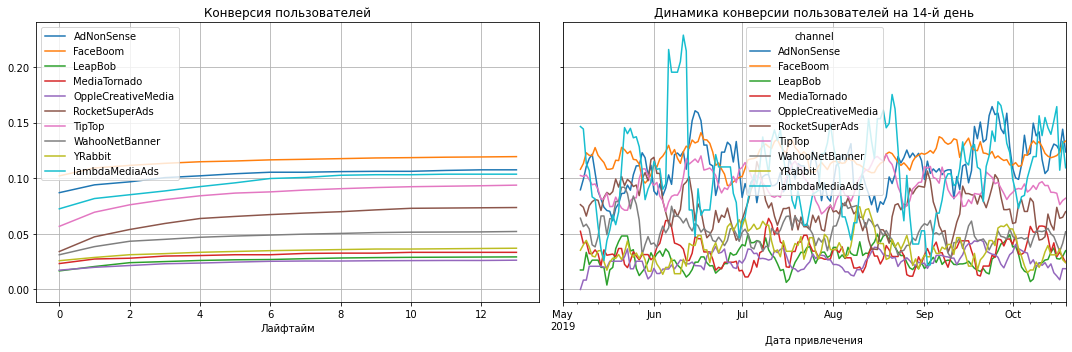

In [46]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    new_profiles, 
    orders, 
    new_date, 
    horizon_days,
    dimensions = dimensions
)
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**Вывод:**
- График **LTV** у всех проектов увеличивается, разница только в процентах
- График **ROI** говорит о неокупаемости 3 каналов, а именно: **TipTop**, **FaceBoom** и **AdNonSense**. Можно выделить также 3 каналов "лидеров" по выручке:**YRabbit**, **MediaTornado** и **lambdaMediaAds**
- Также можно выделить большой скачек, в стоимости привлечения новых пользователей от канала **TipTop**
- Графики удержания платящих и не платящих пользователей стабильно падают
- Можно выделить 3 канала с наибольшей конверсией **FaceBoom** **AdNonSense** и **lambdaMediaAds**

**Общий вывод**

В этом пункте мы рассмотрели такие вопросы как:
- Окупаемость рекламы c помощью графиков LTV и ROI
- Конверсия пользователей и динамика её изменения,удержание пользователей
- Окупаемость рекламы с разбивкой по устройствам
- Окупаемость рекламы с разбивкой по странам
- Окупаемость рекламы с разбивкой по рекламным каналам
- Окупается ли реклама, направленная на привлечение пользователей в целом?
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости?

И сделали соответсвующие выводы:
- Конверсия пользователей в первую неделю увеличиватется и к концу рассматриваемого периода доходит до 80%
- ROI в конце периода доходит до отметки в 80%, что говорит о неокупаемости рекламы, также его динамки значительно снижается на протяжени 14 дней
- **LTV** стабильно повышается у пользователей всех устройств
- График **ROI** говорит о том, что практически на всех платформах, кроме **PC** приложение не окупается
- Удержание платящих пользователей на протяжении всего промежутка времени падает 
- Динамика удержания не платящих пользователей также ухудшается
- Конверсия пользователей **PC** заметно отстает от других платформ
- График **LTV** у пользователей из **United States** самый высокий, тажке все графики из этой категории показывают растущее значение
- **ROI** показывает неокупаемость также у пользователей из **United States**, скорее всего это связано с увеличением затрат на привлечение из этого региона
- Удержание платящих пользователей ожидаемо падает
- Динамика удержания не платящих пользователей также ухудшается
- Cамая большая конверсия у пользователей из **United States**
- График **LTV** у всех проектов увеличивается, разница только в процентах
- График **ROI** говорит о неокупаемости 3 каналов, а именно: **TipTop**, **FaceBoom** и **AdNonSense**. Можно выделить также 3 каналов "лидеров" по выручке:**YRabbit**, **MediaTornado** и **lambdaMediaAds**
- Также можно выделить большой скачек, в стоимости привлечения новых пользователей от канала **TipTop**
- Графики удержания платящих и не платящих пользователей стабильно падают
- Можно выделить 3 канала с наибольшей конверсией **FaceBoom** **AdNonSense** и **lambdaMediaAds**
- Также выделяются два канала с наименьшим удержанием платных пользователей: **FaceBoom** и **AdNonSense**

## 6. Выводы по проекту

**В самом начале проекта мы:**

- ознакомились с первичным форматом данных

- выполнили предварительную оценку данных

**По ходу первоначального анализа было выявлено:**

 - costs имеет 3 столбца и 1800 строк
 - orders имеет 3 столбца и 40212 строк
 - visits имеет 6 столбцов и 309901 строку

**Также было обнаружено:**

- ряд данных с пропущенными и некоторые данные с аномальными значениями

- неккректная запись столбцов, привели к нижнему регистру

- некорректный формат столбцов с датами в каждом дата фрейме


**В ходе второй части работы были созданы:**

- get_profiles() — для создания профилей пользователей,
- get_retention() — для подсчёта Retention Rate,
- get_conversion() — для подсчёта конверсии,
- get_ltv() — для подсчёта LTV.

А также функции для построения графиков:
- filter_data() — для сглаживания данных,
- plot_retention() — для построения графика Retention Rate,
- plot_conversion() — для построения графика конверсии,
- plot_ltv_roi — для визуализации LTV и ROI.


**Исследовательский анализ третьей части дал возможность сделать выводы:**

- cуммарные расходы на рекламу равны 105 497 300 долларов
- cамыми крупными вложениями можно считать каналы TipTop (54 миллиона) и FaceBoom (32 миллиона). Замыкает список канал YRabbit с общим числом вложений в 944 тысячи
- самые крупные по объему затрат каналы это TipTop и FaceBoom. Причем график FaceBoom на протяжении всей кампании вырос не столь заметно в сравнении с графиком TipTop. Однако затраты на рекламу на обоих каналах выросли
- самые "дорогие" пользователи приходят по каналу TipTop, при таких затратах на рекламу это было очевидно. Затем с большим отрывом идут FaceBoom и AdNonSense. Канал organic скорее всего бесплатный, т.к. его не было в графике по затратам и САС для него определился как 0. В этом случае самыми "дешевыми" пользователями будут с канала LeapBobй

**Четвертая часть с разбором маркетинга дала понять некоторые вещи:**
- cуммарные расходы на рекламу равны 105 497 300 долларов
- cамыми крупными вложениями можно считать каналы TipTop (54 миллиона) и FaceBoom (32 миллиона). Замыкает список канал YRabbit с общим числом вложений в 944 тысячи
- самые крупные по объему затрат каналы это TipTop и FaceBoom. Причем график FaceBoom на протяжении всей кампании вырос не столь заметно в сравнении с графиком TipTop. Однако затраты на рекламу на обоих каналах выросли
- самые "дорогие" пользователи приходят по каналу TipTop, при таких затратах на рекламу это было очевидно. Затем с большим отрывом идут FaceBoom и AdNonSense. Канал organic скорее всего бесплатный, т.к. его не было в графике по затратам и САС для него определился как 0. В этом случае самыми "дешевыми" пользователями будут с канала LeapBob
- среднее значение САС равно 1.12, а медианное 1.08, думаю это связанно с большими затратами на рекламу в определенных источниках


**Оценка окупаемости рекламы и разбор графиков в 5 части позволил сделать выводы:**
- Конверсия пользователей в первую неделю увеличиватется и к концу рассматриваемого периода доходит до 80%
- ROI в конце периода доходит до отметки в 80%, что говорит о неокупаемости рекламы, также его динамки значительно снижается на протяжени 14 дней
- **LTV** стабильно повышается у пользователей всех устройств
- График **ROI** говорит о том, что практически на всех платформах, кроме **PC** приложение не окупается
- Удержание платящих пользователей на протяжении всего промежутка времени падает 
- Динамика удержания не платящих пользователей также ухудшается
- Конверсия пользователей **PC** заметно отстает от других платформ
- График **LTV** у пользователей из **United States** самый высокий, тажке все графики из этой категории показывают растущее значение
- **ROI** показывает неокупаемость также у пользователей из **United States**, скорее всего это связано с увеличением затрат на привлечение из этого региона
- Удержание платящих пользователей ожидаемо падает
- Динамика удержания не платящих пользователей также ухудшается
- Cамая большая конверсия у пользователей из **United States**
- График **LTV** у всех проектов увеличивается, разница только в процентах
- График **ROI** говорит о неокупаемости 3 каналов, а именно: **TipTop**, **FaceBoom** и **AdNonSense**. Можно выделить также 3 каналов "лидеров" по выручке:**YRabbit**, **MediaTornado** и **lambdaMediaAds**
- Также можно выделить большой скачек, в стоимости привлечения новых пользователей от канала **TipTop**
- Графики удержания платящих и не платящих пользователей стабильно падают
- Можно выделить 3 канала с наибольшей конверсией **FaceBoom** **AdNonSense** и **lambdaMediaAds**
- Из-за вложения дополнительных средств в регионе **United States** он не вышел на окупаемость, в то время как другие регионы смогли это сделать
- Из-за вложения дополнительных средств также такая ситуация характерна для каналов **FaceBoom** и **TipTop**, ввиду дополнительных расходов они не смогли окупиться
- Канал **AdNonSense** имеет хорошую конверсию, но все равно не окупается, также **CAC** не сильно изменяется на протяжении всего промежутка времени, стоит задуматься об удержании этих пользователей
- В связи с малой конверсией и малыми вложениями пользователи **PC** просто окупаются, но также их конверсия остается самой маленькой в сравнении с другими платформами
- Также выделяются два канала с наименьшим удержанием платных пользователей: **FaceBoom** и **AdNonSense**

**Рекомендации для отдела маркетинга:**
- Снизить рекламные инвестиции с целью привлечения новых пользователей для каналов **TipTop** и **FaceBoom**
- Снизить также рекламные кампании с целью привлечения новых пользователей в регионе **United States**
- Возможно стоит задуматься о проведении рекламных кампаний с целью удержания пользователей **FaceBoom** из **United States**, т.к. у них неплохая конверсия
- Также можно в целом рассмотреть вопросы о дополнительных вложениях с целью удержания платящих пользователей и сосредоточиться на этом, возможно создание каких-то разовых акций для привлечения уже имеющихся пользователей, какие-то персональные предложения с целью удержания
- Возможно стоит попробовать уделить внимание более дешевым, но прибыльным каналам: **lambdamediaads**, **yrabbit**, **RocketSuperAds**(при уменьшении **CAC** этот канал продолжил увеличивать конверсию)